# <center>DIABETES PREDICTION</center>

### Table of Contents
1. Project Overview
2. Project Goal
3. The Dataset
4. Methodology: Algorithms Employed
5. Data Assessment 
6. Exploratory Data Analysis
7. Model Development
8. Saving model

### 1. PROJECT INTRODUCTION

Diabetes is a chronic disease that occurs either when the pancreas fails to produce enough insulin or when one's body is unable to effectively utilize the insulin the body produces. The brief definition above thus suggest that there are two main types of diabetes called type 1 and type 2. For type 1 diabetes (also known as insulin-dependent or childhood-onset), there is insulin production deficiency in the body, which requires daily administration of insulin. Type 2 diabetes on the otherhand (known formally as non-insulin-dependent or adult-onset), occurs when the body cannot effectively use insulin produced. 

In 2014, the World Health Organization (WHO) estimated the number of people with diabetes at 422 million, and in 2016, diabetes was the direct cause of 1.6 million deaths. 

Grim statistics, isn't it?

### 2. PROJECT GOAL

In this project, my goal is to apply SIX machine learning algorithms namely; Logistic Regression, Decision tree, K-Nearest Neighbour, Support Vector Machine, Random Forest, and Naive Bayes to ascertain whether or not, on the basis of the features provided in the dataset, if applied to my machine learning model, a person would be found to have diabetes or not. The features for the prediction were determined by the National Institute of Diabetes, Digestive and Kidney Diseases. 

### 3. DATASET

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### 4. METHODOLOGY: ALGORITHMS EMPLOYED

#### i. Logistic Regression

#### ii. Decision Tree

#### iii. KNN

#### iv. SVM

#### v. Random Forest

#### vi. Naive Bayes

### 5. DATA ASSESSMENT

We begin by importing the relevant libraries

In [61]:
import pickle
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [31]:
# Loading dataset
df = pd.read_csv('diabetes.csv')
df.head().transpose()

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 6. EXPLORATORY DATA ANALYSIS

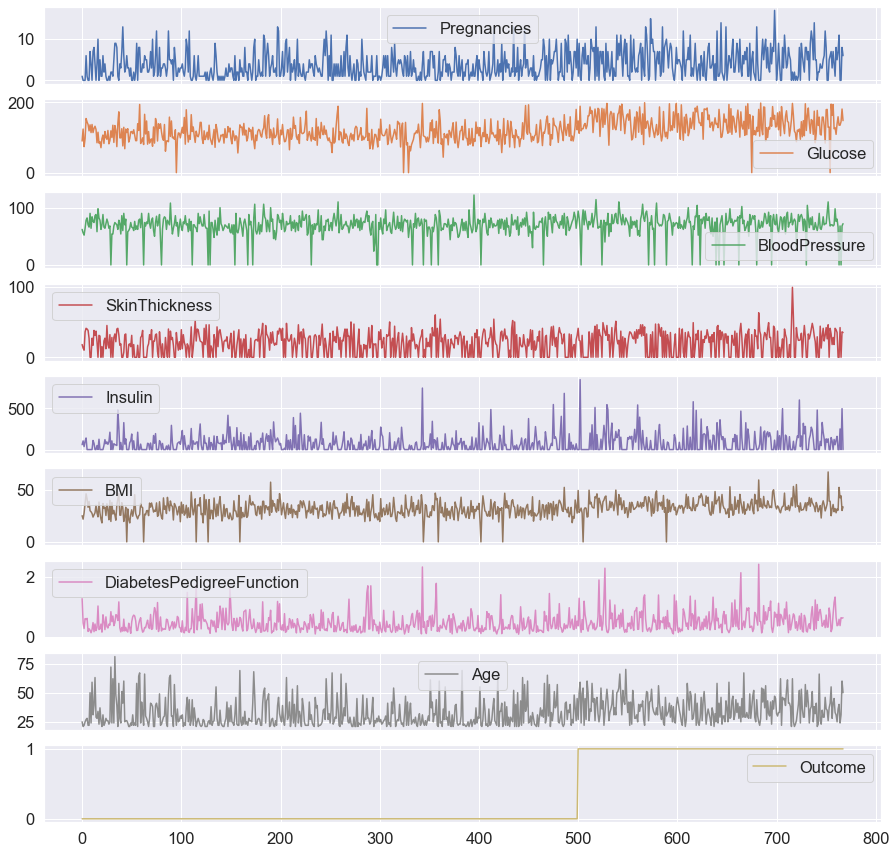

In [34]:
df.sort_values(by=["Outcome"],inplace=True,ignore_index=True)
df.plot(figsize = (15,15), subplots = True)
plt.show()

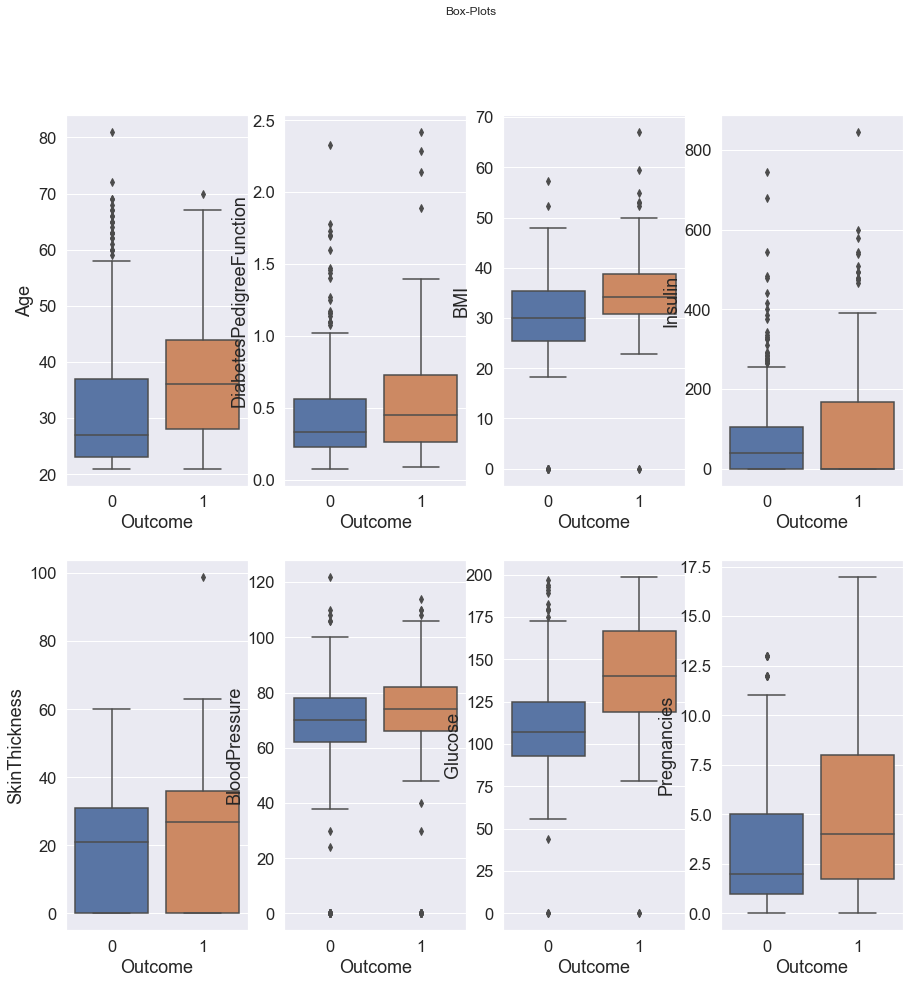

In [35]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.suptitle('Box-Plots')
continuous_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,2):
    for j in range(0,4):
        name =continuous_variables.pop()
        sns.boxplot(ax=axes[i, j], x='Outcome',y=name, data=df)
plt.show()

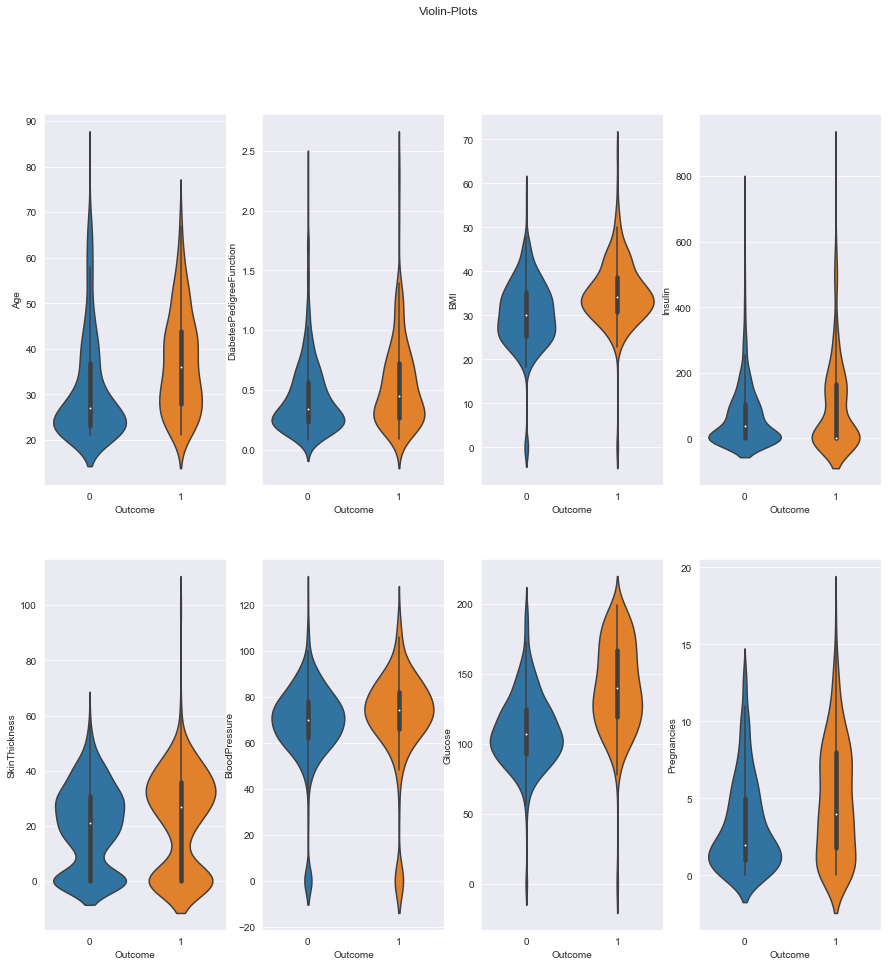

In [8]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 4, figsize=(15, 15))
fig.suptitle('Violin-Plots')
continuous_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in range(0,2):
    for j in range(0,4):
        name =continuous_variables.pop()
        sns.violinplot(ax=axes[i, j], x='Outcome',y=name, data=df)
plt.show()


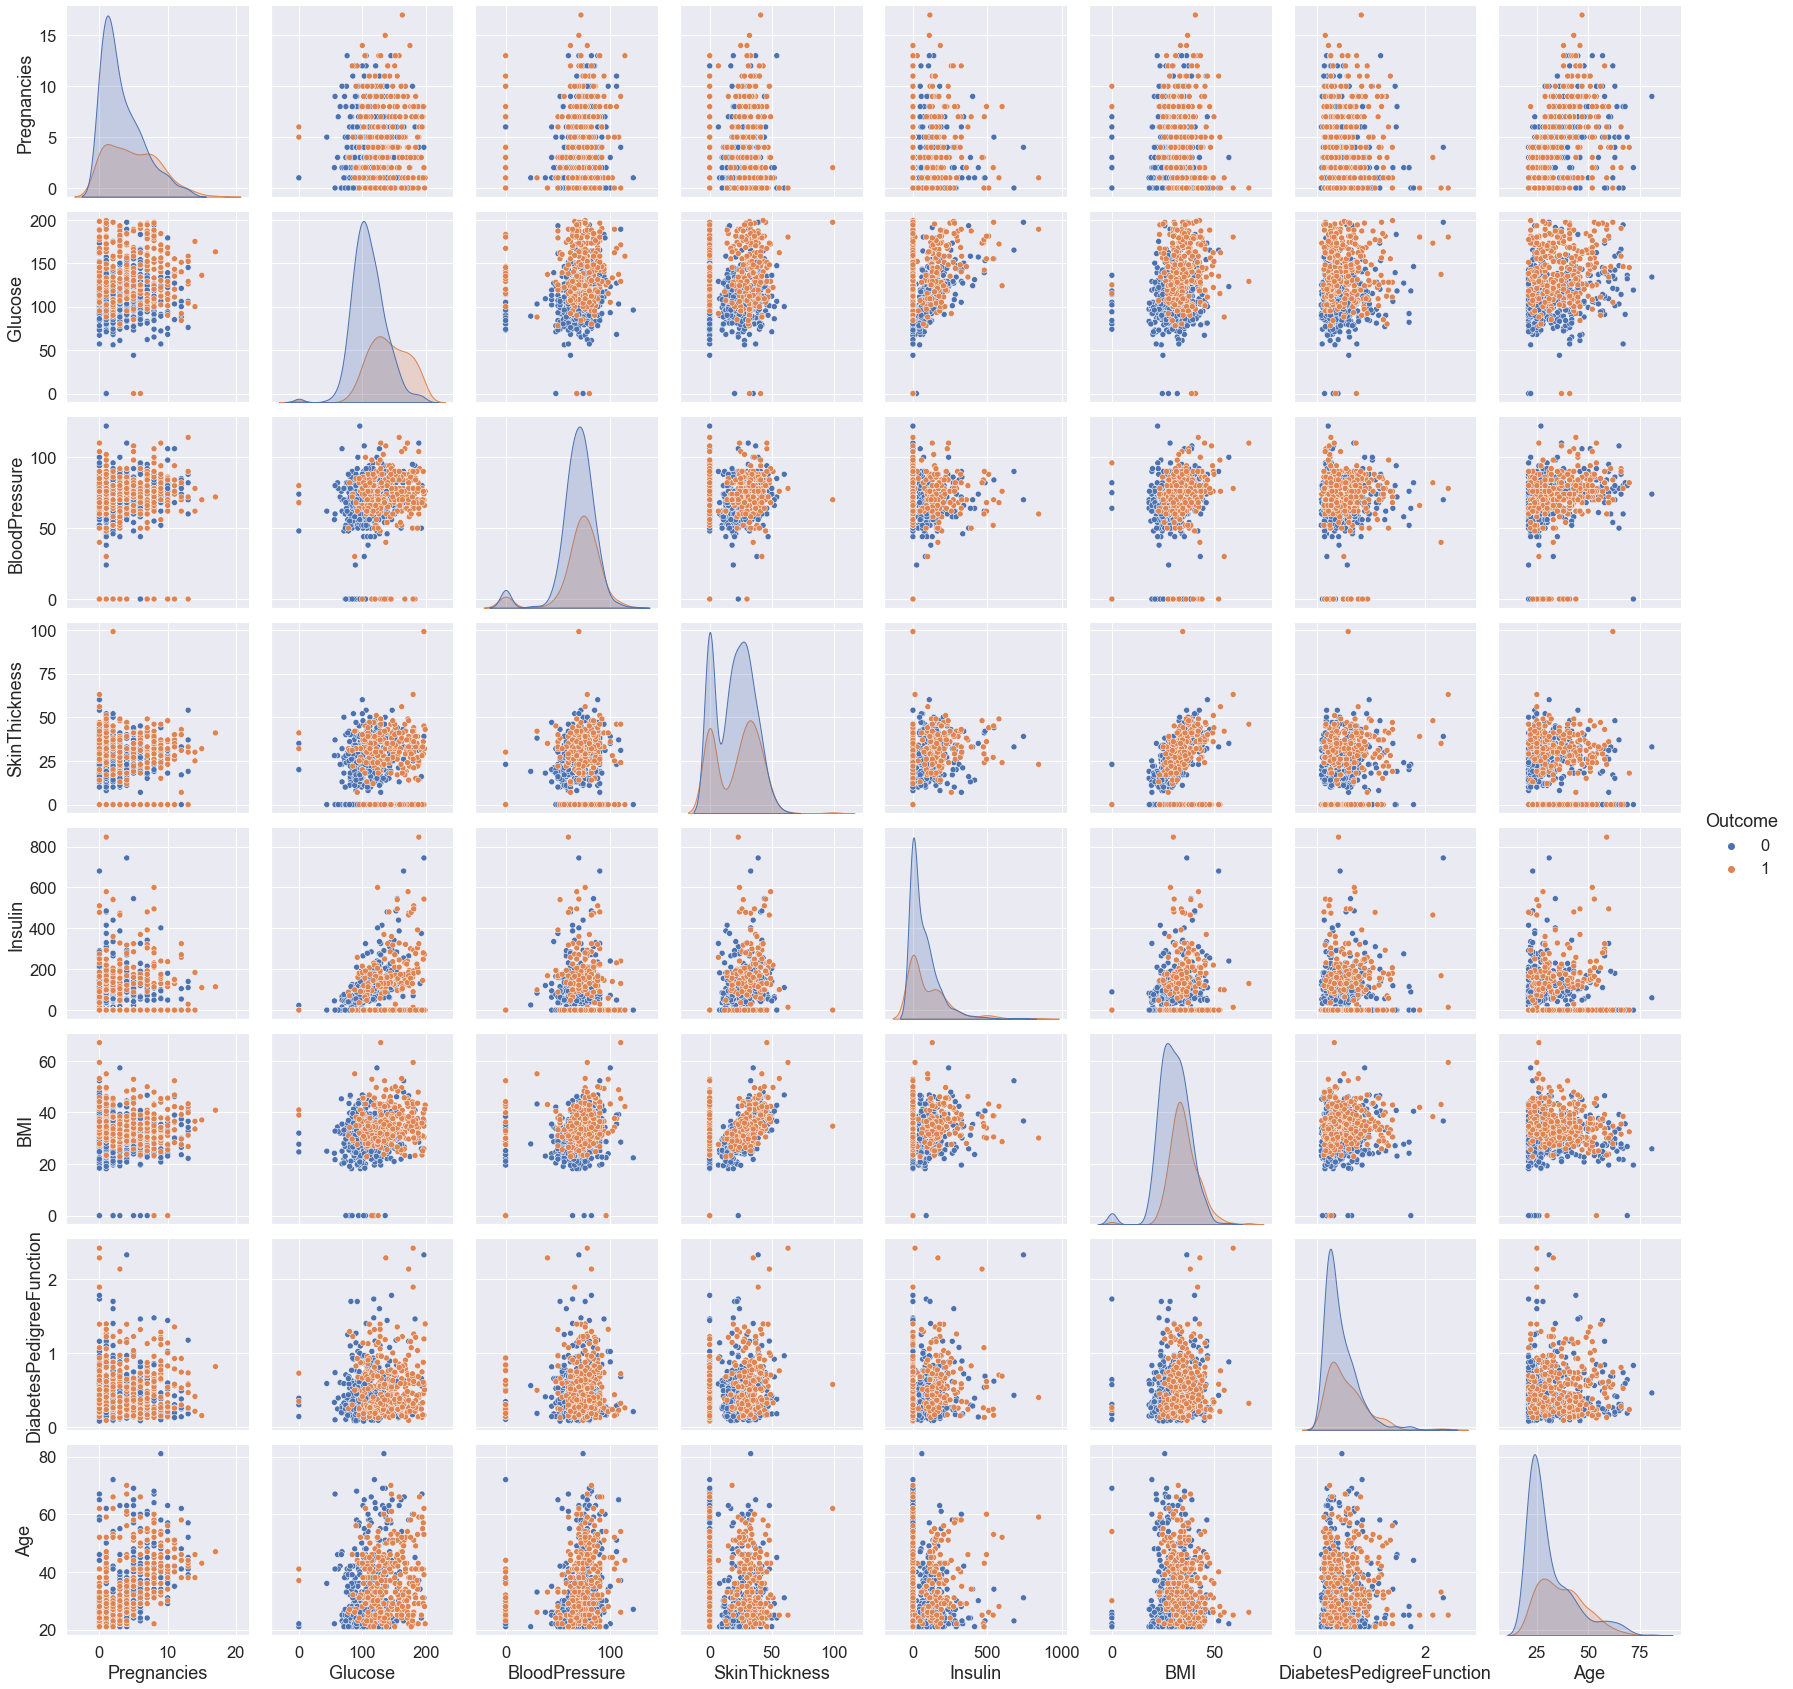

In [9]:
sns.set(font_scale=1.5)
sns.pairplot(data = df, kind = "scatter", hue = "Outcome", aspect =1, height = 3)
plt.show()

In [13]:
corr_matrix=df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131807,0.205941,-0.090282,-0.089290,0.033049,-0.010179,0.581670,0.232391
Glucose,0.131807,1.000000,0.226342,0.016667,0.278115,0.193795,0.049141,0.270411,0.494067
BloodPressure,0.205941,0.226342,1.000000,0.043437,-0.021548,0.295835,0.017603,0.347158,0.175838
SkinThickness,-0.090282,0.016667,0.043437,1.000000,0.479038,0.389314,0.162642,-0.121766,0.047589
Insulin,-0.089290,0.278115,-0.021548,0.479038,1.000000,0.186572,0.216340,-0.050083,0.122651
BMI,0.033049,0.193795,0.295835,0.389314,0.186572,1.000000,0.146864,0.064727,0.272459
DiabetesPedigreeFunction,-0.010179,0.049141,0.017603,0.162642,0.216340,0.146864,1.000000,0.034006,0.169383
Age,0.581670,0.270411,0.347158,-0.121766,-0.050083,0.064727,0.034006,1.000000,0.265540
Outcome,0.232391,0.494067,0.175838,0.047589,0.122651,0.272459,0.169383,0.265540,1.000000


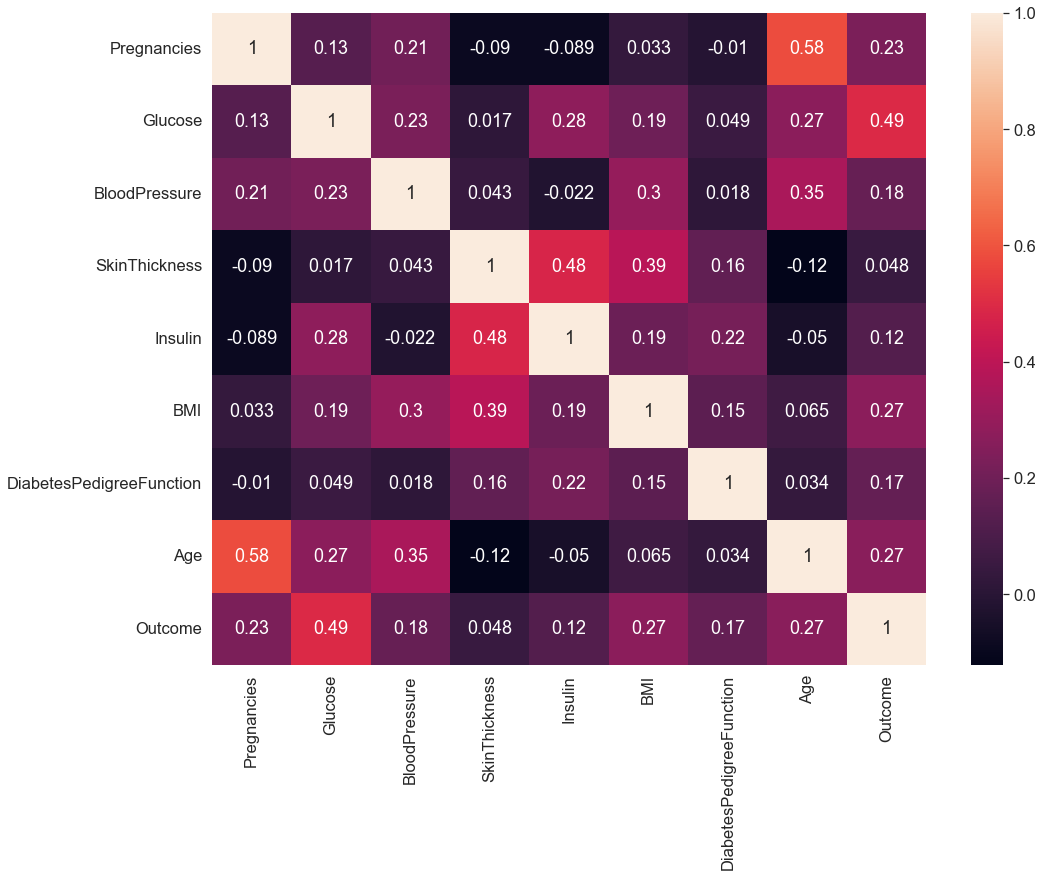

In [14]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

-6.5 13.5
37.5 201.5
35.0 107.0
-49.5 82.5
-198.0 330.0
13.699999999999994 49.70000000000001
-0.30737499999999995 1.165625
-0.75 65.25


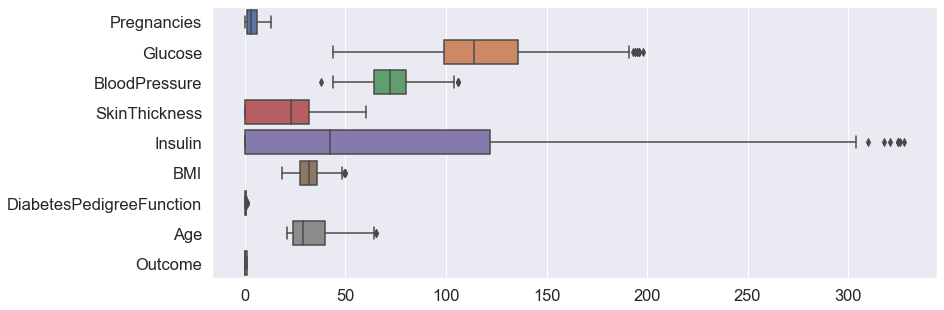

In [36]:
#Eliminating Outliers with IQR Method
continuous_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                        "BMI", "DiabetesPedigreeFunction", "Age"]
for i in range(0,8):
    Q1 = df[continuous_variables[i]].quantile(0.25)
    Q3 = df[continuous_variables[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(lower_limit, upper_limit)
    df = df[(df[continuous_variables[i]]>lower_limit)&(df[continuous_variables[i]]<upper_limit)]

plt.figure(figsize=(13,5))
sns.boxplot(data=df,orient='h')
plt.show()

In [37]:
df_majority = df[(df["Outcome"]==0)]
df_minority = df[(df["Outcome"]==1)]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=500,random_state=42)
df = pd.concat([df_minority_upsampled,df_majority])
df["Outcome"].value_counts()

1    500
0    438
Name: Outcome, dtype: int64

###### Scaling the data

In [38]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 2.25616085,  0.47051134,  0.80497174, ...,  0.35399794,
         2.17890062,  0.93594872],
       [-0.63453561,  0.2730881 , -0.26642023, ...,  0.41168844,
        -1.01854741,  0.93594872],
       [-0.92360525,  1.81957008, -0.80211621, ..., -0.47015214,
         0.35178746,  0.93594872],
       ...,
       [ 0.81081262,  0.24018423,  0.98353706, ...,  1.046284  ,
         0.2604318 , -1.06843461],
       [-0.34546596,  1.78666621, -0.80211621, ..., -0.70503491,
        -0.74448044, -1.06843461],
       [ 1.67802156, -0.12175836,  0.44784108, ...,  0.28806593,
         0.99127706, -1.06843461]])

In [39]:
X=df.drop('Outcome',axis='columns')
Y=df["Outcome"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.40, random_state=4)
print("train data length:",len(X_train))
print("test data length:",len(X_test))

train data length: 562
test data length: 376


In [40]:
lr=LogisticRegression(C = 0.1, random_state = 42, 
                      solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [41]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,Y_train)
    prediction=a.predict(X_train)
    Y_pred=a.predict(X_test)
    score1=accuracy_score(Y_train,prediction)
    score=accuracy_score(Y_test,Y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.715302
[Logistic Regression] test data accuracy is : 0.712766
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.845745
[KNN] training data accuracy is : 0.884342
[KNN] test data accuracy is : 0.792553
[SVM] training data accuracy is : 0.765125
[SVM] test data accuracy is : 0.787234
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.888298
[Naive Bayes] training data accuracy is : 0.731317
[Naive Bayes] test data accuracy is : 0.736702


In [46]:
model_scores={'Logistic Regression':lr.score(X_test,Y_test),
             'KNN classifier':knn.score(X_test,Y_test),
             'Support Vector Machine':svm.score(X_test,Y_test),
             'Random forest':rm.score(X_test,Y_test),
              'Decision tree':dt.score(X_test,Y_test),
              'Naive Bayes':gnb.score(X_test,Y_test)
             }
model_scores

{'Logistic Regression': 0.7127659574468085,
 'KNN classifier': 0.7925531914893617,
 'Support Vector Machine': 0.7872340425531915,
 'Random forest': 0.8882978723404256,
 'Decision tree': 0.8457446808510638,
 'Naive Bayes': 0.7367021276595744}

In [50]:
rm_y_preds = rm.predict(X_test)
print(classification_report(Y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       180
           1       0.83      0.98      0.90       196

    accuracy                           0.89       376
   macro avg       0.90      0.88      0.89       376
weighted avg       0.90      0.89      0.89       376



In [51]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.712766,0.792553,0.787234,0.888298,0.845745,0.736702


<AxesSubplot:>

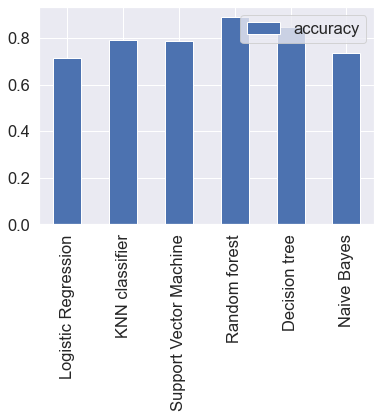

In [55]:
model_compare.T.plot(kind='bar') 

In [57]:
feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Pregnancies': 0.14824874880299124,
 'Glucose': 0.028667239813555928,
 'BloodPressure': -0.04771083398624526,
 'SkinThickness': -0.012513640119956447,
 'Insulin': 0.00036355736098703516,
 'BMI': 0.025059050345751687,
 'DiabetesPedigreeFunction': 0.3611879907767143,
 'Age': -0.000326685543024651}

<AxesSubplot:title={'center':'Feature Importance'}>

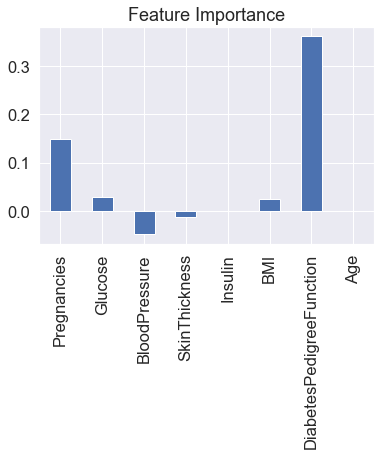

In [58]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [60]:
saved_model = pickle.dumps(lr)
lr_from_pickle = pickle.loads(saved_model)
lr_from_pickle.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [62]:
joblib.dump(lr , 'model_lr')
m_jlib = joblib.load('model_lr')
m_jlib.predict(X_test) 

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

#### Summary:

#### Model accuracy

Logistic Regression         - 71.3%

Decision tree               - 84.6%

K-Nearest Neighbour         - 79.3%

Support Vector Machine      - 78.7%

Random Forest               - 88.83%

Naive Bayes                 - 73.7%

In comparing the six Machine learning algorithms applied in this project, Random Forest algorithm appears to be the most suitable for the prediction as it is the algorithm that recorded the highest accuracy score of 88.83%.